---
---

**PSTB Bootcamp - Hackathon 1 - Subject 3**: *Exploring Employee Attrition and Performance in a Corporate Environment (IBM HR Analytics)*


---


**Date** : 23/10/2025


---


**Team**: YC Dynamics (Yacine Fares, Clément Philbert)

---
---

# 1 ) Data Loading and Preprocessing

## a. Downloading the IBM HR Analytics dataset and extracting the CSV

In [113]:
## Downloading the IBM HR Analytics dataset using the requests module (version 2.32.5)

# Importing the requests library
import requests
url = 'https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%208%20-%20Hackathon%20&%20AB%20Testing/W8D1%20-%20Hackathon/IBM%20HR%20Analytics%20Employee%20Attrition%20&%20Performance.zip'

response = requests.get(url)
file_Path = 'IBM_HR_Analytics_Employee_Attrition_Performance.zip'

if response.status_code == 200:
    with open(file_Path, 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully')
else:
    print('Failed to download file')

File downloaded successfully


In [114]:
## Extracting the IBM HR Analytics csv file from the archive and moving it to a "dataset" folder using
## the zipfile and os modules (dropping unnecessary folder cascading from the zip).

# Importing libraries
import zipfile
import os

zip_path = "IBM_HR_Analytics_Employee_Attrition_Performance.zip"
file_to_extract = "IBM HR Analytics Employee Attrition & Performance/IBM HR Analytics Employee Attrition & Performance/WA_Fn-UseC_-HR-Employee-Attrition.csv"   # the exact internal path
output_dir = "dataset"

# Making sure the output folder exists
os.makedirs(output_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(file_to_extract) as source_file:
        # Get only the filename (drop folders)
        filename = os.path.basename(file_to_extract)
        output_path = os.path.join(output_dir, filename)

        # Write file contents
        with open(output_path, 'wb') as target_file:
            target_file.write(source_file.read())

print(f"Extracted {file_to_extract} → {output_path}")

Extracted IBM HR Analytics Employee Attrition & Performance/IBM HR Analytics Employee Attrition & Performance/WA_Fn-UseC_-HR-Employee-Attrition.csv → dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


## b. Loading the csv dataset into a dataframe with pandas

In [115]:
## Loading the IBM HR Analytics dataset in a dataframe

# Importing the pandas library
import pandas as pd

# Creating the dataframe from the csv
df = pd.read_csv("dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

## c. Initial high-level data exploration

In [116]:
# Checking first five entries of the dataset with .head()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [117]:
# Checking structure and datatypes with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

> 👉 The dataset has 1470 entries and 35 columns

> 👉 Conclusions and recommendations regarding data transformation to perform:

| Columns currently int64                                                                                                                                                                                                | Current dtype | Suggested dtype                                | Reason                                                                                                              |
| -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------- | ---------------------------------------------- | ------------------------------------------------------------------------------------------------------------------- |
| `Age`                                                                                                                                                                                                    | int64         | ✅ keep as int64                                | Continuous numeric variable.                                                                                        |
| `DailyRate`, `HourlyRate`, `MonthlyIncome`, `MonthlyRate`                                                                                                                                                | int64         | ✅ keep as int64                                | Continuous numeric values.                                                                                          |
| `DistanceFromHome`, `PercentSalaryHike`, `YearsAtCompany`, `YearsInCurrentRole`, etc.                                                                                                                    | int64         | ✅ keep as int64                                | Continuous or count-based — fine as numeric.                                                                        |
| `Education`, `EnvironmentSatisfaction`, `JobInvolvement`, `JobLevel`, `JobSatisfaction`, `PerformanceRating`, `RelationshipSatisfaction`, `StockOptionLevel`, `TrainingTimesLastYear`, `WorkLifeBalance` | int64         | ⚠️ **convert to categorical (pd.Categorical)** | These are *ordinal* variables — coded as 1–4 or 1–5. Converting to categorical helps with readability and analysis. |
| `EmployeeCount`, `StandardHours`                                                                                                                                                                         | int64         | ⚠️ **drop or convert to constant**             | Usually constant across all rows (e.g., 1 or 80). They add no value — verify and drop if true.                      |
| `EmployeeNumber`                                                                                                                                                                                         | int64         | ⚠️ **treat as object/string (ID)**             | It’s an identifier, not numeric data — shouldn’t be used in math.                                                   |


| Columns currently object                                                                                             | Current dtype | Suggested dtype                       | Reason                                                                          |
| -------------------------------------------------------------------------------------------------- | ------------- | ------------------------------------- | ------------------------------------------------------------------------------- |
| `Attrition`                                                                                        | object        | ⚠️ **convert to boolean or category** | Typically “Yes” / “No”. Convert with `map({'Yes': 1, 'No': 0})` or to category. |
| `BusinessTravel`, `Department`, `EducationField`, `Gender`, `JobRole`, `MaritalStatus`, `OverTime` | object        | ⚠️ **convert to categorical**         | Nominal categorical variables — better memory and efficiency.                   |
| `Over18`                                                                                           | object        | ⚠️ **drop or set as constant**        | Usually all "Y". If so, drop (no information value).                            |


## d. Looking for missing values or duplicates

In [118]:
# Looking for potential missing values in the dataframe (returning the sum of null values per column)
print(df.isnull().sum())
print(f"\n\nNumber of missing data in datateset: ", df.isnull().sum().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

> 👉 There are no missing values in the dataset

In [119]:
# Looking for potential duplicates in the dataframe (returning the count as an integer)
df.duplicated().sum()

np.int64(0)

> 👉 There are no duplicates in the dataset (returned value is 0)

In [120]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

print("\nNumerical variables :", len(num_cols))
print(num_cols)

print("\nCategorical variables :", len(cat_cols))
print(cat_cols)


Numerical variables : 26
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical variables : 9
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [121]:
for c in cat_cols:
    bad = pd.to_numeric(df[c]
                        .astype(str)
                        .str.replace(',', '.', regex=False)
                        .str.strip(), errors='coerce').isna()

## e. Converting and cleaning the dataset before analysis

Dropping irrelevant columns

In [122]:
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)

In [123]:
# Verifying the columns dropped
df.shape

(1470, 31)

In [124]:
# Encoding categorial columns to simplify comparisons
#df['MaritalStatus'] = df['MaritalStatus'].map({"Single" : 0, "Married" : 1, "Divorced" : 2})
#df['OverTime'] = df['OverTime'].map({"No" : 0, "Yes" : 1})
#df['Gender'] = df['Gender'].map({"Female" : 0, "Male" : 1})
#df['Attrition'] = df['Attrition'].map({"No" : 0, "Yes" : 1})

In [125]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# 2 ) Exploratory Data Analysis (EDA)

In [126]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


| Infos        | Age                | Distance From Home | Years at company | Years In Current Role | Years Since Last Promotion | Years With Current Manager |
|--------------|--------------------|--------------------|------------------|-----------------------|----------------------------|----------------------------|
| Average      | 37 years old       | 9 km               | 7 years          | 4.2                   | 2.2                        | 4.1                        |
| Over 75 %    | above 43 years old | 14 km away         | 9 years          | 7                     | 3                          | 7                          |
| Oldest / Max | 60 years old       | 29 km              | 40 years         | 18                    | 15                         | 17                         |

### EDA Summary

- The **attrition rate is 16%**, indicating an **imbalanced dataset**.   
- **Main numerical variables:** Age, Monthly Income, Distance from Home, Years at Company.  
- **Main categorical variables:** Job Role, Department, Marital Status, Gender, OverTime.  
- **Observed trend:** Employees who work overtime, earn lower salaries, or live farther from work tend to have higher attrition rates.  
- **Strong negative correlations:** MonthlyIncome, Age, YearsAtCompany.  
- **Positive correlations:** DistanceFromHome, OverTime.  


**a. Comprehensive Data Distribution Analysis**

Distribution of Numeric Variables

<Figure size 1500x1200 with 0 Axes>

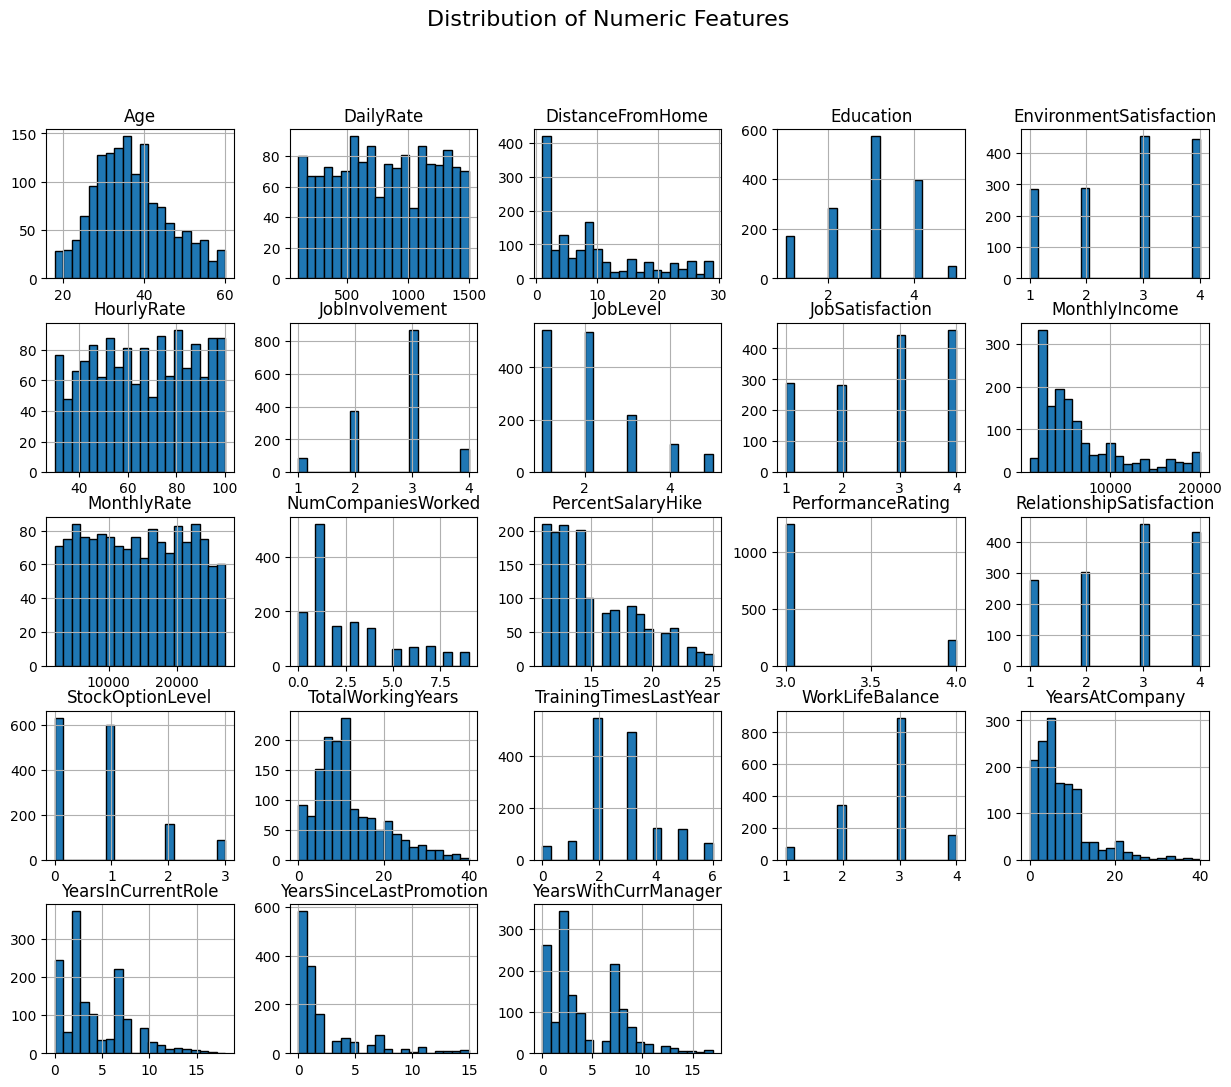

In [128]:
# Visualize numeric distributions
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 12))
df[numeric_cols].hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

✅ Purpose: Identify skewness, outliers, and patterns in numeric variables.

Correlation Heatmap (to identify key relationships)

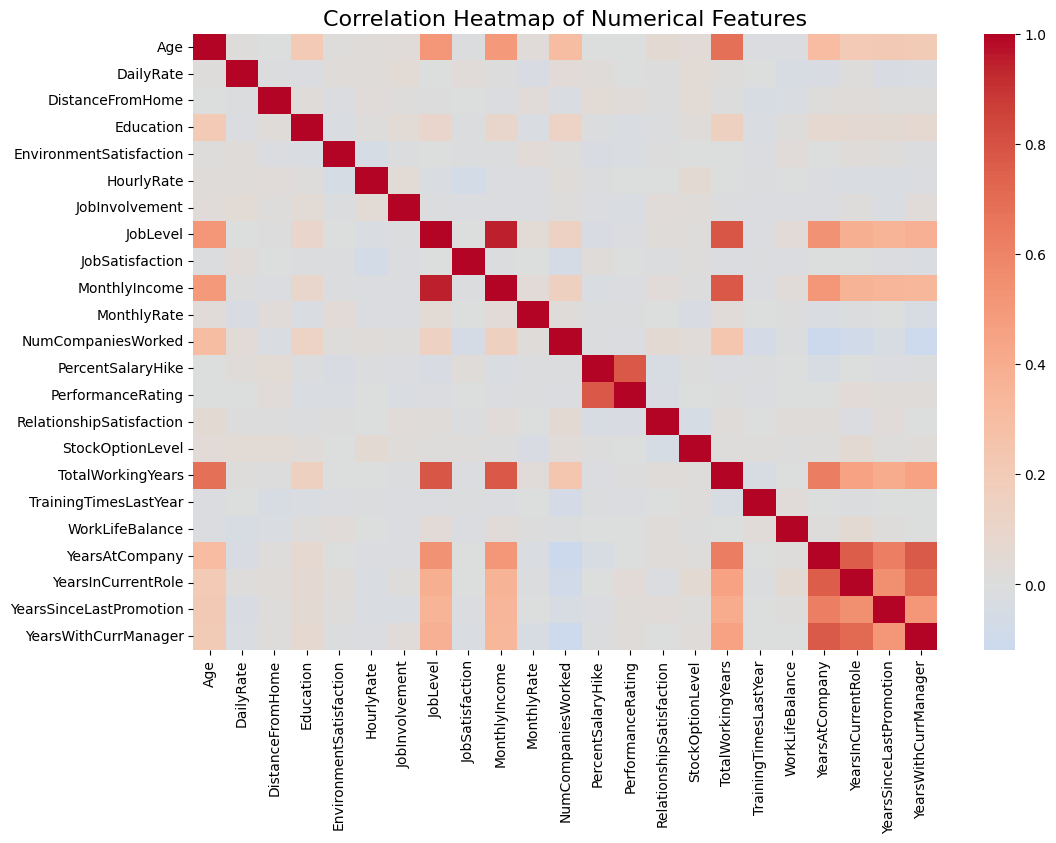

In [129]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

✅ Purpose: Check how features relate — e.g., MonthlyIncome vs JobLevel.

**b. Attrition Overview and Basic Trend**

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


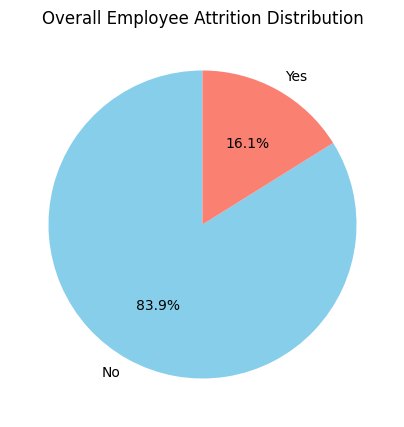

In [130]:
# Count and percentage
attr_counts = df['Attrition'].value_counts()
attr_percent = df['Attrition'].value_counts(normalize=True) * 100

print(attr_counts)
print(attr_percent)

# Pie chart for quick visualization
plt.figure(figsize=(5,5))
plt.pie(attr_counts, labels=attr_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Overall Employee Attrition Distribution")
plt.show()


16 % of employees have left the company

**c. Attrition by Demographic and Job Variables**

Age Distribution by Attrition

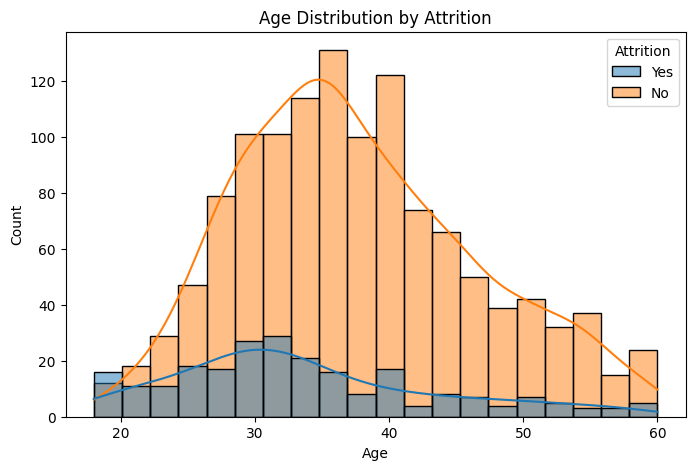

In [131]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, bins=20)
plt.title("Age Distribution by Attrition")
plt.show()

Attrition by Gender

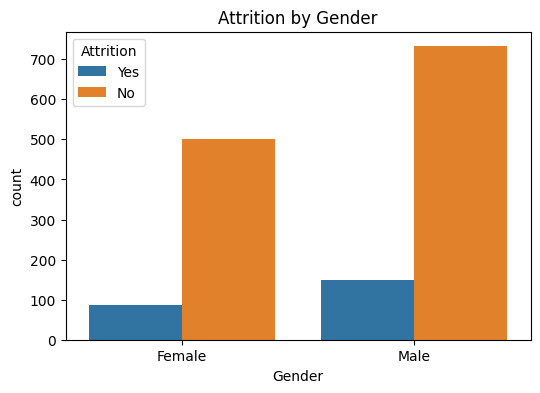

In [132]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title("Attrition by Gender")
plt.show()

Attrition by Education Level

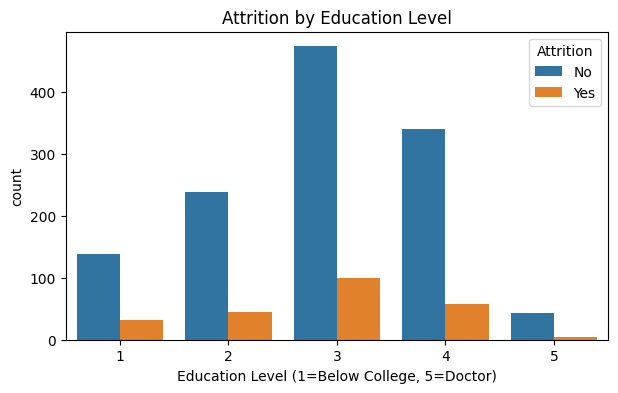

In [133]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Education', hue='Attrition')
plt.title("Attrition by Education Level")
plt.xlabel("Education Level (1=Below College, 5=Doctor)")
plt.show()

Attrition by Job Role

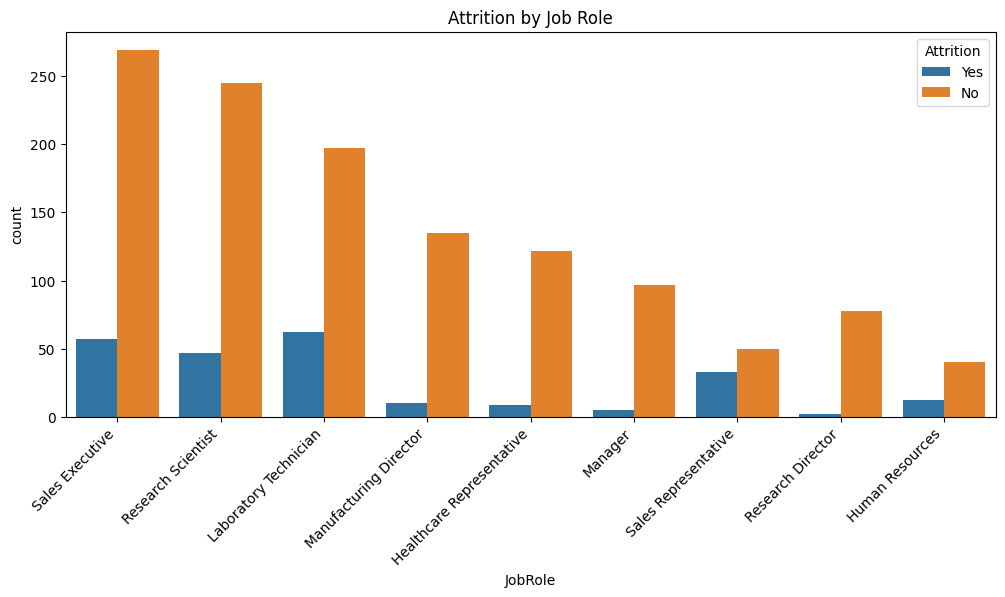

In [134]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title("Attrition by Job Role")
plt.xticks(rotation=45, ha='right')
plt.show()

Attrition by Department

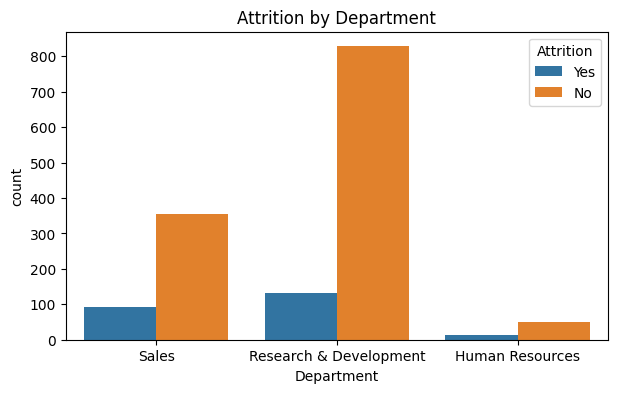

In [135]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.show()

**d. Satisfaction and Work-Life Balance Analysis**

Job Satisfaction vs Attrition

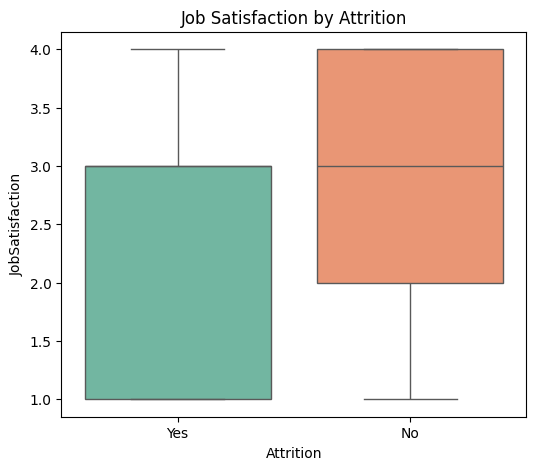

In [136]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', hue='Attrition',legend=False, palette='Set2')
plt.title("Job Satisfaction by Attrition")
plt.show()

Environment Satisfaction vs Attrition

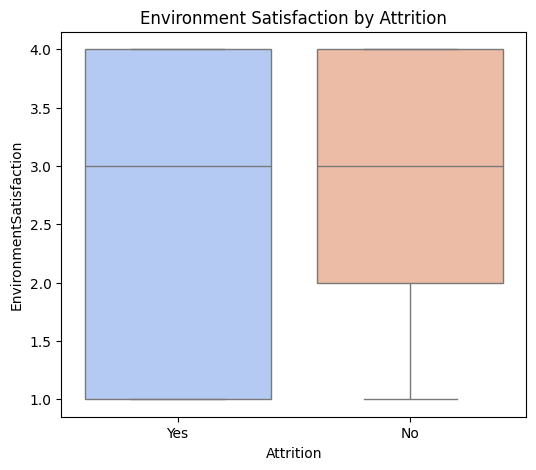

In [137]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='Attrition', y='EnvironmentSatisfaction',hue='Attrition',legend=False, palette='coolwarm')
plt.title("Environment Satisfaction by Attrition")
plt.show()

Work-Life Balance vs Attrition

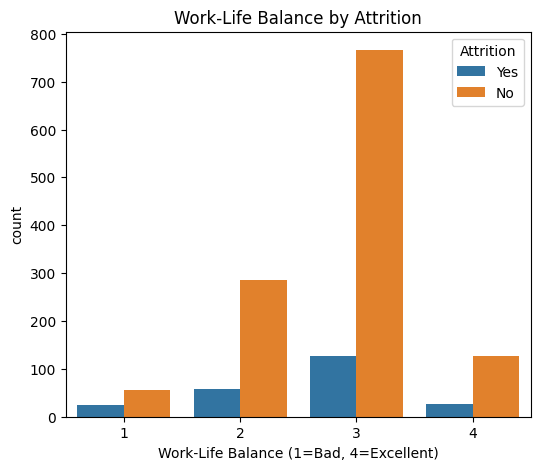

In [138]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title("Work-Life Balance by Attrition")
plt.xlabel("Work-Life Balance (1=Bad, 4=Excellent)")
plt.show()

**Summary of Key Findings**

Overall attrition rate ≈ 16%.

Younger and lower-tenure employees are more likely to leave.

Job role and department have strong effects — Sales and Lab Tech roles show higher turnover.

Low satisfaction (Job and Environment) correlates strongly with attrition.

Poor work-life balance increases attrition risk.

# 3 ) Correlation and Trend Analysis

### Correlation and Trend Analysis

This section explores how employee attributes relate to attrition and performance.
We will:
1. Analyze attrition rates by Education, JobSatisfaction, and WorkLifeBalance.
2. Observe performance trends across departments and job roles.
3. Build cross-tabulations and heatmaps to visualize multi-variable relationships such as:
   - DistanceFromHome × JobRole × Attrition
   - MonthlyIncome × Education × Attrition


In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

In [150]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0}).astype(int)

Average attrition rate by Education:


,Attrition
Education,
1,0.182
2,0.156
3,0.173
4,0.146
5,0.104


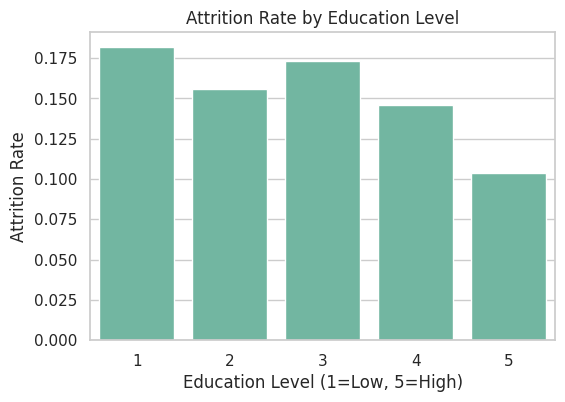

In [176]:
# --- Education ---
edu_attr = df.groupby("Education")["Attrition"].mean().round(3)
print("Average attrition rate by Education:")
display(edu_attr)

plt.figure(figsize=(6,4))
sns.barplot(x=edu_attr.index, y=edu_attr.values)
plt.title("Attrition Rate by Education Level")
plt.xlabel("Education Level (1=Low, 5=High)")
plt.ylabel("Attrition Rate")
plt.show()


Average attrition rate by JobSatisfaction:


,Attrition
JobSatisfaction,
1,0.228
2,0.164
3,0.165
4,0.113


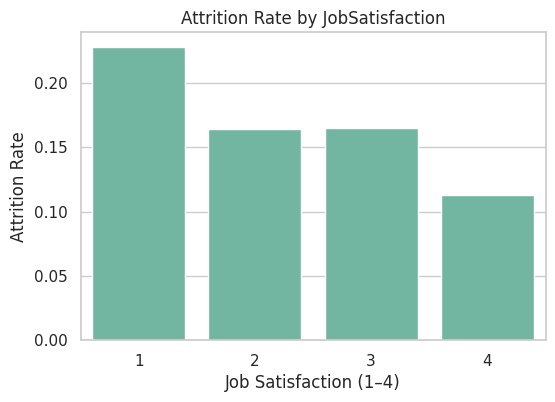

In [177]:
# --- JobSatisfaction ---
js_attr = df.groupby("JobSatisfaction")["Attrition"].mean().round(3)
print("\nAverage attrition rate by JobSatisfaction:")
display(js_attr)

plt.figure(figsize=(6,4))
sns.barplot(x=js_attr.index, y=js_attr.values)
plt.title("Attrition Rate by JobSatisfaction")
plt.xlabel("Job Satisfaction (1–4)")
plt.ylabel("Attrition Rate")
plt.show()


Average attrition rate by WorkLifeBalance:


,Attrition
WorkLifeBalance,
1,0.312
2,0.169
3,0.142
4,0.176


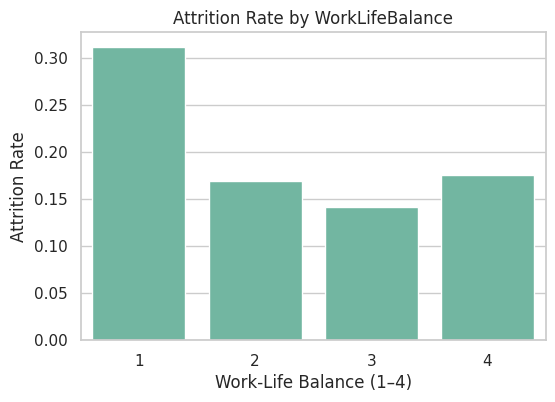

In [178]:
# --- WorkLifeBalance ---
wlb_attr = df.groupby("WorkLifeBalance")["Attrition"].mean().round(3)
print("\nAverage attrition rate by WorkLifeBalance:")
display(wlb_attr)

plt.figure(figsize=(6,4))
sns.barplot(x=wlb_attr.index, y=wlb_attr.values)
plt.title("Attrition Rate by WorkLifeBalance")
plt.xlabel("Work-Life Balance (1–4)")
plt.ylabel("Attrition Rate")
plt.show()

- **Education:** The higher the education level, the lower the attrition rate.  
  → Highly educated employees (level 5) rarely leave.  
  Possible reasons: better salary, job fit, and professional stability.

- **JobSatisfaction:** Direct relationship — higher satisfaction = lower resignation.  
  → Satisfaction is one of the strongest retention factors.

- **WorkLifeBalance:** The trend is not perfectly linear:  
  - Level 1 (very poor balance): ~31 % attrition  
  - Levels 2–3: better retention  
  - Level 4 rises slightly, likely due to fewer observations (statistical noise)


Average Performance by Department:


,PerformanceRating
Department,
Human Resources,3.14
Research & Development,3.16
Sales,3.14


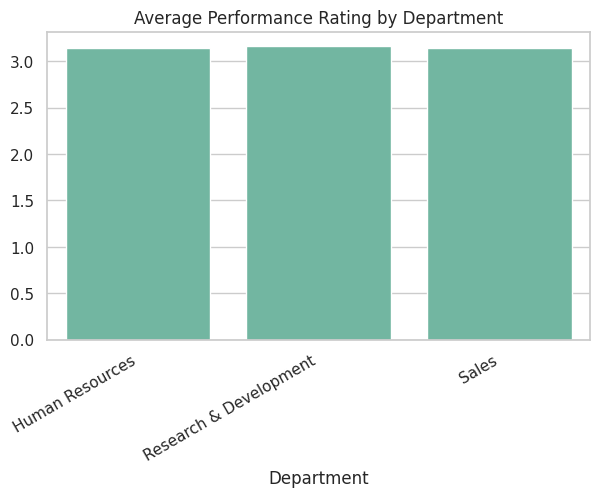


Average Performance by Job Role:


,PerformanceRating
JobRole,
Healthcare Representative,3.15
Human Resources,3.13
Laboratory Technician,3.16
Manager,3.20
Manufacturing Director,3.19
Research Director,3.10
Research Scientist,3.17
Sales Executive,3.13
Sales Representative,3.14


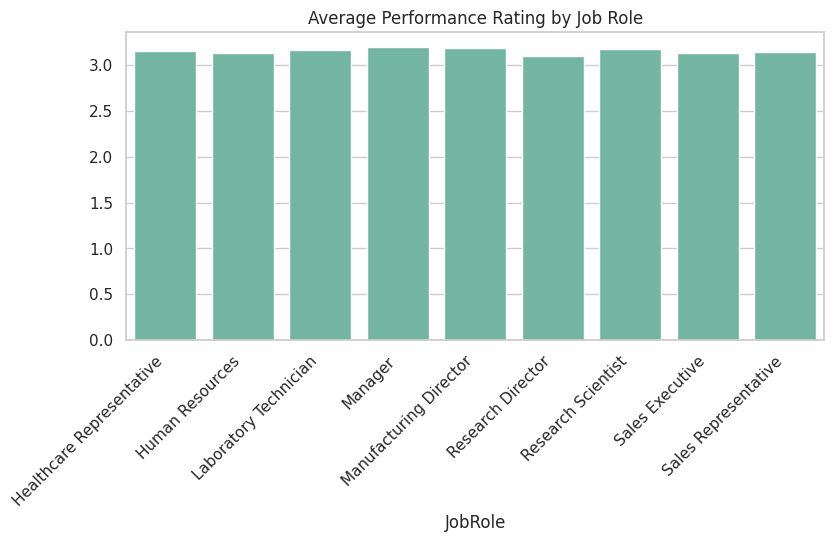

In [179]:
# Verify that PerformanceRating exists
if "PerformanceRating" in df.columns:
    # Average performance by department
    perf_dept = df.groupby("Department")["PerformanceRating"].mean().round(2)
    print("Average Performance by Department:")
    display(perf_dept)

    plt.figure(figsize=(7,4))
    sns.barplot(x=perf_dept.index, y=perf_dept.values)
    plt.title("Average Performance Rating by Department")
    plt.xticks(rotation=30, ha="right")
    plt.show()

    # Average performance by job role
    perf_role = df.groupby("JobRole")["PerformanceRating"].mean().round(2)
    print("\nAverage Performance by Job Role:")
    display(perf_role)

    plt.figure(figsize=(9,4))
    sns.barplot(x=perf_role.index, y=perf_role.values)
    plt.title("Average Performance Rating by Job Role")
    plt.xticks(rotation=45, ha="right")
    plt.show()
else:
    print("Column 'PerformanceRating' not found.")



Attrition rate by DistanceFromHome (quartiles) and JobRole:


JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
DistanceGroup,,,,,,,,,
Q1 (Near),0.026,0.105,0.224,0.079,0.062,0.042,0.133,0.103,0.417
Q2,0.000,0.111,0.254,0.000,0.065,0.000,0.156,0.130,0.429
Q3,0.062,0.231,0.237,0.000,0.115,0.053,0.164,0.198,0.348
Q4 (Far),0.167,0.545,0.242,0.100,0.050,0.000,0.197,0.262,0.400


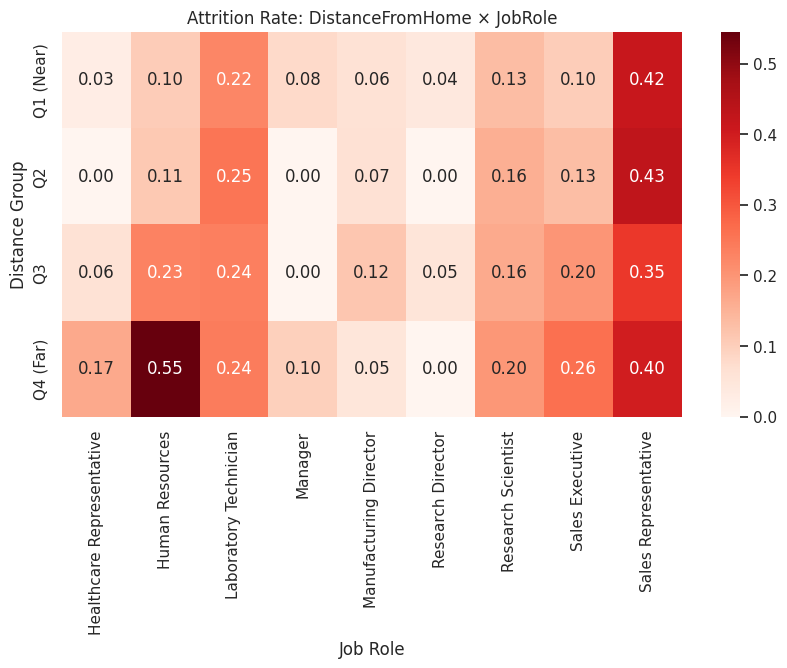


Attrition rate by Education and Income level:


IncomeGroup,Low,Below Avg,Avg,Above Avg,High
Education,,,,,
1,0.318,0.179,0.056,0.130,0.103
2,0.375,0.057,0.132,0.167,0.022
3,0.321,0.207,0.077,0.122,0.099
4,0.232,0.188,0.135,0.095,0.118
5,0.250,0.200,0.000,0.167,0.071


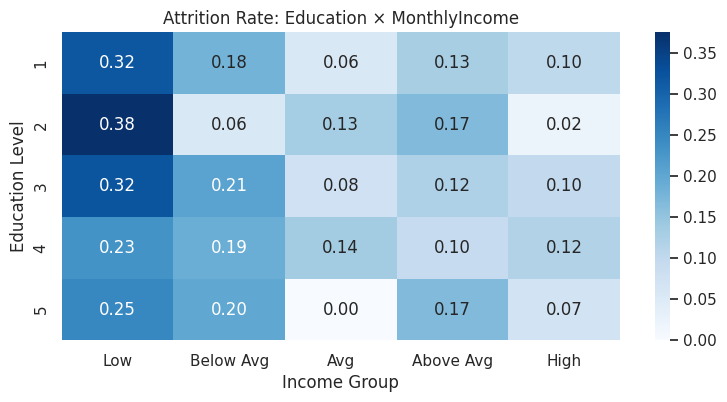

In [183]:
# --- DistanceFromHome × JobRole × Attrition ---
if {"DistanceFromHome", "JobRole", "Attrition"}.issubset(df.columns):
    # Bin distance into 4 groups (quartiles)
    df["DistanceGroup"] = pd.qcut(df["DistanceFromHome"], q=4, labels=["Q1 (Near)", "Q2", "Q3", "Q4 (Far)"])

    pivot_distance = pd.crosstab(
        df["DistanceGroup"], df["JobRole"],
        values=df["Attrition"], aggfunc="mean"
    ).round(3)

    print("\nAttrition rate by DistanceFromHome (quartiles) and JobRole:")
    display(pivot_distance)

    plt.figure(figsize=(10,5))
    sns.heatmap(pivot_distance, annot=True, cmap="Reds", fmt=".2f")
    plt.title("Attrition Rate: DistanceFromHome × JobRole")
    plt.xlabel("Job Role")
    plt.ylabel("Distance Group")
    plt.show()

# --- MonthlyIncome × Education × Attrition ---
if {"MonthlyIncome", "Education", "Attrition"}.issubset(df.columns):
    df["IncomeGroup"] = pd.qcut(df["MonthlyIncome"], q=5, labels=["Low","Below Avg","Avg","Above Avg","High"])

    pivot_income = pd.crosstab(
        df["Education"], df["IncomeGroup"],
        values=df["Attrition"], aggfunc="mean"
    ).round(3)

    print("\nAttrition rate by Education and Income level:")
    display(pivot_income)

    plt.figure(figsize=(9,4))
    sns.heatmap(pivot_income, annot=True, cmap="Blues", fmt=".2f")
    plt.title("Attrition Rate: Education × MonthlyIncome")
    plt.xlabel("Income Group")
    plt.ylabel("Education Level")
    plt.show()


- **DistanceFromHome × JobRole:**  
  Attrition increases for employees who live farther away, especially in Sales and Laboratory roles.  
  → Commuting distance and workload may jointly affect turnover.

- **Education × MonthlyIncome:**  
  Higher education levels correspond to higher income and significantly lower attrition.  
  → Confirms that both salary and qualification are strong retention drivers.


### Summary of Correlation and Trend Analysis

- **Education, JobSatisfaction, and WorkLifeBalance** are negatively associated with attrition:
  - More educated, satisfied, and balanced employees are less likely to leave.
- **DistanceFromHome** and **OverTime** correlate positively with attrition.
- **Performance** is mostly stable but slightly lower in high-turnover roles.
- **Heatmaps reveal clear interaction effects:**
  - High attrition among employees who live far away and have lower salaries.
  - Low attrition among employees with higher education and income levels.
- These findings highlight four key HR levers:
  1. Training and career development (Education)
  2. Engagement and recognition (JobSatisfaction)
  3. Work-life balance improvement (WorkLifeBalance)
  4. Flexible work options or remote policies (DistanceFromHome)


# 4 ) Key Visualizations summary

# 5 ) Summary of findings

# 6 ) Retention Strategy Development